# Project report (Sep 28)


## Independent Cascating


In [26]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph


In [128]:
with open("graph/nc_mini.json", "r") as graph_data:
    graph_data = json.load(graph_data)
    NC_digraph = json_graph.node_link_graph(graph_data)

In [130]:
# np.random.seed(24)
nodes_set = NC_digraph.nodes()
init_nodes = np.random.choice(NC_digraph.nodes(), 1)[0]
print init_nodes

YJ5_YCrzLX5Laav13qG0qw


In [29]:
a = [1,2,3]
b = a[::]
b.append(4)
print a
print b


[1, 2, 3]
[1, 2, 3, 4]


In [34]:
# A. Cascate function
def cascade(init_nodes):#, dist_d):
    action = {}
    n = len(init_nodes)
    #np.random.seed(random_d)
    #init_nodes = np.random.choice(NC_digraph.nodes(), 1)[0]
    for i in init_nodes:
        action[i] = 1
    #st = set()
    #st.add(init_nodes)
    init_list = init_nodes[::]
    while len(init_list) != 0 :
        curr_node = init_list.pop(0)
        for i in NC_digraph[curr_node]:
            if i not in action:
                b = NC_digraph.node[i]['review_count']
                a =  NC_digraph[curr_node][i]['weight']
                #np.random.seed(12)
                b_dist = np.sqrt(np.random.beta(a = a, b = b))
                #np.random.seed(12)
                u_dist = np.random.uniform(0,1)
                if b_dist > u_dist:
                    action[i] = 1
                    #st.add(i)
                    init_list.append(i)
                    n = n + 1

    return n

In [48]:
# Given the initial nodes, run independent cascades for N times to get the mean of number of nodes been activated
def b_test(N, init_nodes):
    result = []
    #start_time  = time.time()
#     np.random.seed(24)
    for i in range(N):
        r = cascade(init_nodes)
        result.append(r)
    return np.mean(result)

In [49]:
# b-test timing
start = time.time()
b_test(1000, init_nodes)
print time.time() - start

0.322869062424


In [45]:
def c_test(N, init_nodes):
    result = []
    for i in range(100):
        tmp = b_test(N, init_nodes)
        result.append(tmp)
    return {'mean':np.mean(result), 'std': np.std(result), 'max': np.maximum(result), 'min': np.minimum(result)}

def test_plot(sample_list):
    sample_mean = []
    sample_std = []
    for i in sample_list:
#         sample_mean.append(c_test(i)['mean'])
        sample_std.append(c_test(i, init_nodes)['std'])
#     plt.plot(sample_list, sample_mean, label = 'MEAN')
    plt.plot(sample_list, sample_std, label = 'STD')
    print 'mean', sample_mean
    print 'std', sample_std
    plt.legend()

mean []
std [4.9056916943485147, 4.3933898927821105, 2.2742717515723578, 1.6534474409548072, 0.91724115573701637, 0.77107291899015618, 0.50521606021582488]


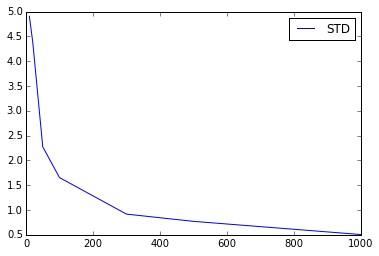

In [42]:
test_plot([10,20, 50, 100, 300,500, 1000])

##Run Influence function f(S) with |S| = 2, N = 10,000   
Your starting nodes should be: 
   'E6Eh1bz6fpo6EOPtctA-sg', 'VFOwxpOWH9RZ3iMelkRd7A'


In [46]:
init_nodes = ['E6Eh1bz6fpo6EOPtctA-sg', 'VFOwxpOWH9RZ3iMelkRd7A']
result = c_test(10000, init_nodes)
print result['mean'], result['std']

ValueError: invalid number of arguments

In [ ]:
nodes_set = NC_digraph.nodes()

In [ ]:
# return the node that maximize influence on the basis of current nodes
def getMaxGreedy(nodes_set, N, curr_nodes):
    result = []
    max_node = None
    max_influence = 0
    for i in nodes_set:
        tmp = b_test(N, curr_nodes + [i])
        if tmp > max_influence:
            max_node = i
            max_influence = tmp
    return max_node


### |S|=3 Influence Maximization Problem Solution

In [74]:
def calculateS3(nodes_set):
    # Perform getMaxGreedy for three times to get the solution for S3
    opt1 = getMaxGreedy(nodes_set, 1000, [])
    nodes_set.remove(opt1)
    opt2 = getMaxGreedy(nodes_set,1000, [opt1])
    nodes_set.remove(opt2)
    opt3 = getMaxGreedy(nodes_set, 1000, [opt1, opt2])
    
    max_influence = b_test(1000,[opt1, opt2, opt3])

    print 'The key to |S|=3 Influence Maximization Problem is'
    print opt1, opt2, opt3
    print "The Maximized influence is: ", max_influence
    
    return ((opt1, opt2, opt3), max_influence)

Run the greedy algorithm on the North Carolina graph 100 times.  Use N = 1,000, k = 3, [iterations of the tree, t = 10]
 
Plot the observed maximum influence for each run of the 100 runs of the greedy algorithm.  Find the maximum and minimum of your runs, fmax and fmin.  The ratio fmin/fmax will be called δ (we used lambda for this variable in class, but I renamed it delta to avoid confusion with lambda in question 3.  In theory, this value shouldn't be less than 60%.  Be prepared to report your value.
 

In [118]:
#mul_cascade is a improved version of b_test to get mean, max and min values of independent cascades

def mul_cascade(N, init_nodes):
    result = []
    #start_time  = time.time()
#     np.random.seed(24)
    for i in range(N):
        r = cascade(init_nodes)
        result.append(r)
    return np.mean(result)

def getMaxGreedy_2(nodes_set, N, curr_nodes):
    result = []
    max_node = None
    max_influence = 0
    for i in nodes_set:
        tmp = mul_cascade(N, curr_nodes + [i])
        if tmp > max_influence:
            max_node = i
            max_influence = tmp
    return max_node


In [119]:
#N: number of runs N in mul_cascade
#K: number of initial nodes for influence maximization
def calculateSK(nodes_set, N, K):
    # Perform getMaxGreedy for three times to get the solution for S3
    opt = []
    curr_nodes = []
    for i in range(K):
        tmp = getMaxGreedy_2(nodes_set, N, curr_nodes)
        curr_nodes = curr_nodes + [tmp]
        nodes_set.remove(tmp)
    
    max_influence = mul_cascade(N, curr_nodes)

#     print 'The key to |S|=3 Influence Maximization Problem is'
    print curr_nodes
#     print "The Maximized influence is: ", max_influence
    
    return (curr_nodes, max_influence)

In [131]:
print calculateSK(nodes_set, 100, 3)

[u'NzWLMPvbEval0OVg_YDn4g', u'VhI6xyylcAxi0wOy2HOX3w', u'Z1FWaNNO8oxaHLYB9XhQDg']
([u'NzWLMPvbEval0OVg_YDn4g', u'VhI6xyylcAxi0wOy2HOX3w', u'Z1FWaNNO8oxaHLYB9XhQDg'], 44.899999999999999)


In [141]:
def multiRun(nodes_set, N, num):
    result = []
    for i in xrange(num):
        result.append(calculateSK(nodes_set, N, 3)[1])   
    print result
    print np.min(result)/np.max(result)
    plt.plot(result)

[u'Y--yRCncNlQCNULP8I5h6Q', u'TyIJUHF_psqpjkL7OerTHQ', u'MOaDlqJ6wWvnJN4wGqreqw']
[u'E6Eh1bz6fpo6EOPtctA-sg', u'UmCAhWcU_abaaESenKUiLw', u'pNMUZiL-TaQojaEygESgwQ']
[u'd8y98FiNtI8OQFAp2tvoKg', u'7gAKXYdqYu5LfmpAHVSHVA', u'tm_HvdZmUMGht1-xjGQF7Q']
[u'9P_5UGjc3t3Bo_yJ5A7iAQ', u'qlYjP4O4BJXE9XaF9MqTYA', u'4itIWbWKDMXef7VzAQ41-g']
[u'5hhvqWu2vCo4HSKFw4H0pQ', u'8ED8BPCXKXZnGsVMyl5Bhw', u'dXkJ91eJ60KppeHC9dmavA']
[28.07, 19.289999999999999, 22.449999999999999, 21.780000000000001, 15.18]
0.540790879943


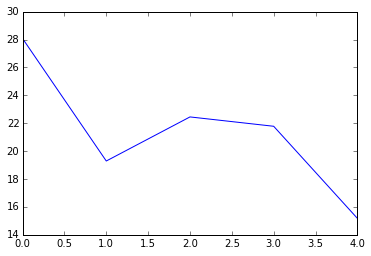

In [142]:
multiRun(nodes_set, 100, 5)

In [127]:
init_nodes

u'rozyN2khxvZ7Re3BT9TkpA'

###Repeat the traveling salesman problem, but add noise to the edge weights (we're simulating traffic lights and other possible delays).  

In [ ]:
# Generate 25 Cities on 2D Euclidean Plane
x = np.linspace(1,10,5)
y = np.linspace(1,10,5)
tmpx, tmpy =  np.meshgrid(x,y)

cities = np.array([tmpx, tmpy])
cities = np.reshape(cities, (2,-1)).T

plt.scatter(cities[:,0], cities[:,1])
plt.xlim(0,11)
plt.ylim(0,11)
plt.show()

In [ ]:
def plot_path(pcities):
    plt.plot(pcities[1:,0], pcities[1:,1],'o')
    plt.plot(pcities[:,0], pcities[:,1])
    plt.plot(pcities[0,0], pcities[0,1], '^')
    plt.xlim(np.min(pcities[:,0])-1, np.max(pcities[:,0])+1)
    plt.ylim(np.min(pcities[:,1])-1, np.max(pcities[:,1])+1)

In [ ]:
plot_path(cities)

In [ ]:
def distance(citypath):
    distance = 0
    number_of_cities = len(citypath)
    
    # loop over all cities
    for j in xrange(number_of_cities):
        if j == (number_of_cities - 1): # FINAL POINT CONNECTS WITH THE FIRST ONE
            distance += np.linalg.norm(citypath[j,:] - citypath[0,:])
        else:
            distance += np.linalg.norm(citypath[j,:] - citypath[j+1,:])
    return distance

In [93]:
# Helper Function 
def swapindex(cities):
    indices = range(len(cities))
    # take two random indices to swap
    c1,c2 = np.random.choice(indices, 2, replace=False)
    
    # remember the cities to swap
    tmp1 = cities[c1,:]
    tmp2 = cities[c2,:]
    
    # do the actual swapping
    changedCities = cities.copy()
    changedCities[c1,:] = tmp2
    changedCities[c2,:] = tmp1
    
    return changedCities

def changepath(inputcities, n_swaps):
    cities = inputcities.copy()
    # Make n_swaps number of swaps
    for i in range(n_swaps):
        swappedCities = swapindex(cities)
        cities=swappedCities.copy()

    return cities

In [ ]:
# TODO
def simulated_annealing_rst(function, initial_X, initial_temp, cool, reanneal, iterr):
    
    accepted = 0
    X = initial_X.copy()
    T = initial_temp
    
    history = list()
    # Evaluate E
    prev_E = function(X)
    history.append(prev_E)
    
    for i in xrange(iterr):
        # Propose new path.
        X_star = changepath(X, 2)
        # Evaluate E
        new_E = function(X_star)
        delta_E = new_E - prev_E
        
        # Flip a coin
        U = np.random.uniform()
        if U < np.exp(-delta_E / T):
            accepted += 1
            history.append(new_E)
            # Copy X_star to X
            X = X_star.copy()
            prev_E = new_E

        # Check to cool down
        if accepted % reanneal == 0:
            T *= cool
            if T < 0.001: # Reheat
                T = 1.
            
    return X, history

In [ ]:
# Simulated Annealing Parameters
initial_X = cities # Start random
initial_temp = 2.
cool = 0.9
reanneal = 100
iterr = 30000

In [ ]:
solution, history = simulated_annealing_rst(distance, initial_X, initial_temp, cool, reanneal, iterr)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history)
plt.title("History")
plt.ylabel("$f(x_1,x_2)$",fontsize=12)
plt.xlabel("Accepted", fontsize=12)
plt.show()